# Step 1: Import essential packages.


    
* **Numpy** to be used for mathematical operations
* **Matplotlib** seaborn for visualization
* **Pymc3** for Bayesian statistical modeling
* **Arviz** for visualization of the results from pymc3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import arviz as az
from matplotlib.pyplot import figure

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.




---


# **Step 2** 
We should create synthetic data. Based on the paper, data was 
created from Yeoh model with C1=1.2, C2=-0.057, and C3=0.004. Finally, noise was added to the data.


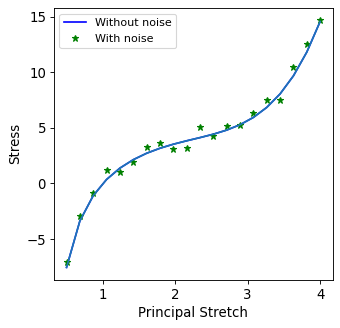

In [5]:
np.random.seed(19680801) 
N=20
landa=np.linspace(0.5,4,N)
C1=1.202
C2=-0.057
C3=0.004
snoise=0.5
sigma=2*(C1*(landa-landa**(-2))+2*C2*(landa**3-3*landa+1+3*landa**(-2)-2*landa**(-3))+\
3*C3*(landa**5-6*landa**3+3*landa**2+9*landa-6-9*landa**(-2)+12*landa**(-3)-4*landa**(-4)))
a=1
sigma_1=np.random.normal(0,snoise,N)+sigma


figure(figsize=(4.5,4.5), dpi=80)
plt.plot(landa,sigma,'b',label='Without noise')
plt.plot(landa,sigma_1, 'g*',label='With noise')
    
plt.plot(landa,sigma)
plt.xlabel('Principal Stretch', size= '12')
plt.ylabel('Stress', size= '12')

plt.xlim=([0.4, 4.4])
plt.ylim=([-8, 16])
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()
plt.show()



---

# **Step 3** 



Identifying the parameter for Neo-Hookean (Based model). Pymc3 is used for Bayesian identification. 

In [6]:
with pm.Model() as case:
  C1=pm.Uniform('C1',lower=-50,upper=50)
  Y=pm.Normal('Y', mu=2*(C1*(landa-1/landa**2)),sd=snoise, observed=sigma_1)
  trace=pm.sample(10000,tune=2000,chains=2,random_seed=123)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [C1]
Sampling 2 chains, 0 divergences: 100%|██████████| 24000/24000 [00:05<00:00, 4633.63draws/s]
The acceptance probability does not match the target. It is 0.7183512728944547, but should be close to 0.8. Try to increase the number of tuning steps.




---
# **Step 4** 

Having the parameters, we can construct and plot the posterior predictive.

In [7]:
ppc = pm.sample_posterior_predictive(trace, samples=2000,model=case)


/Users/milad.zeraatpisheh/anaconda3/envs/tf/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 2000/2000 [00:01<00:00, 1559.11it/s]


/Users/milad.zeraatpisheh/anaconda3/envs/tf/lib/python3.6/site-packages/arviz/stats/stats.py:487: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


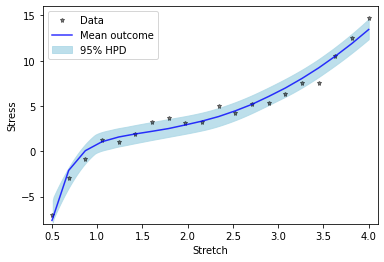

<Figure size 360x360 with 0 Axes>

In [45]:
_, ax = plt.subplots();
figure(figsize=(4.5,4.5), dpi=80);
az.plot_hpd(
   landa,
    ppc["Y"],
    ax=ax,
    fill_kwargs={"alpha": 0.8, "color": "lightblue", "label": "95% HPD"},
)
ax.plot(landa, sigma_1, "*",color='black', ms=5, alpha=0.5, label="Data");
ax.plot(landa, ppc["Y"].mean(0), label="Mean outcome",color='blue', alpha=0.8);
ax.set_ylabel("Stress");
ax.set_xlabel("Stretch");
ax.set(xlim=(0.4, 4.1), ylim=(-8, 16));
ax.legend(ncol=1, fontsize=10);




---
# **Step 5** 

 We can also visualize posterior probability

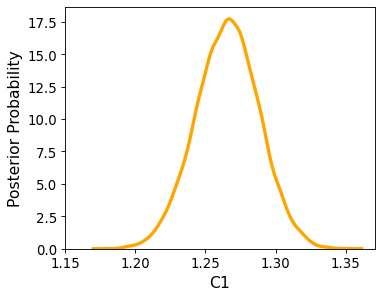

In [13]:
import seaborn as sns
figure(figsize=(5,4), dpi=80)
sns.distplot(trace['C1'], hist=False, kde=True, 
             bins=int(180/5), color = 'orange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

plt.xlabel('C1', size=14)
plt.ylabel('Posterior Probability', size =14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(np.arange(1.15,1.4, step=0.05));



---

# **Step 6** 

 We are ready to identify Mooney-Rivlin Parameters and constructing PP and visualization:

In [14]:
with pm.Model() as case1:
  C1=pm.Uniform('C1',lower=-50,upper=50)
  C2=pm.Uniform('C2',lower=-50,upper=50)
  Y=pm.Normal('Y', mu=2*(C1*(landa-1/landa**2)+C2*(1-landa**(-3))),sd=snoise, observed=sigma_1)
  trace1=pm.sample(10000,tune=2000,chains=1,random_seed=123)
ppc = pm.sample_posterior_predictive(trace1, samples=2000,model=case1)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [C2, C1]
Sampling chain 0, 0 divergences: 100%|██████████| 12000/12000 [00:06<00:00, 1716.78it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
/Users/milad.zeraatpisheh/anaconda3/envs/tf/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 2000/2000 [00:01<00:00, 1397.04it/s]


/Users/milad.zeraatpisheh/anaconda3/envs/tf/lib/python3.6/site-packages/arviz/stats/stats.py:487: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


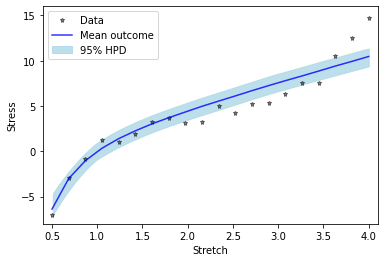

<Figure size 360x360 with 0 Axes>

In [15]:
_, ax = plt.subplots()
figure(figsize=(4.5,4.5), dpi=80)
az.plot_hpd(
   landa,
    ppc["Y"],
    ax=ax,
    fill_kwargs={"alpha": 0.8, "color": "lightblue", "label": "95% HPD"},
)
ax.plot(landa, sigma_1, "*",color='black', ms=5, alpha=0.5, label="Data")
ax.plot(landa, ppc["Y"].mean(0), label="Mean outcome",color='blue', alpha=0.8)
ax.set_ylabel("Stress")
ax.set_xlabel("Stretch")
ax.set(xlim=(0.4, 4.1), ylim=(-8, 16))
ax.legend(ncol=1, fontsize=10);

 

---

# **Based model with Mooney-Rivlin parameters**



In [16]:
N=20
Y1= np.zeros((5000,N))
for i in range(5000):
    C1= trace1['C1'][i]
    Y1[i,:]=2*(C1*(landa-1/landa**2))+snoise*np.random.normal()


/Users/milad.zeraatpisheh/anaconda3/envs/tf/lib/python3.6/site-packages/arviz/stats/stats.py:487: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


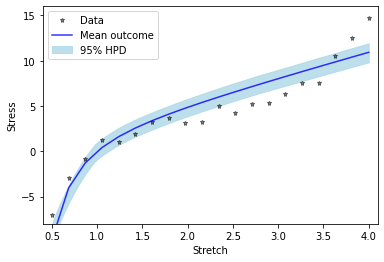

<Figure size 360x360 with 0 Axes>

In [17]:
_, ax = plt.subplots()
figure(figsize=(4.5,4.5), dpi=80)
az.plot_hpd(
   landa,
    Y1,
    ax=ax,
    fill_kwargs={"alpha": 0.8, "color": "lightblue", "label": "95% HPD"},
)
ax.plot(landa, sigma_1, "*",color='black', ms=5, alpha=0.5, label="Data")
ax.plot(landa, Y1.mean(0), label="Mean outcome",color='blue', alpha=0.8)
ax.set_ylabel("Stress")
ax.set_xlabel("Stretch")
ax.set(xlim=(0.4, 4.1), ylim=(-8, 16))
ax.legend(ncol=1, fontsize=10);



---


# **Yeoh model.**

In [18]:

with pm.Model() as case2:
  C1=pm.Uniform('C1',lower=-10,upper=20)
  C2=pm.Uniform('C2',lower=-10,upper=20)
  C3=pm.Uniform('C3',lower=-10,upper=20)
  Y=pm.Normal('Y', mu=2*(C1*(landa-landa**(-2))+2*C2*(landa**3-3*landa+1+3*landa**(-2)-2*landa**(-3))+\
  3*C3*(landa**5-6*landa**3+3*landa**2-6-9*landa**(-2)+12*landa**(-3)-4*landa**(-4))),sd=snoise, observed=sigma_1)
  trace2=pm.sample(10000,tune=2000,chains=1,random_seed=123)
ppc = pm.sample_posterior_predictive(trace2, samples=2000,model=case2)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [C3, C2, C1]
Sampling chain 0, 0 divergences: 100%|██████████| 12000/12000 [00:42<00:00, 282.28it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
/Users/milad.zeraatpisheh/anaconda3/envs/tf/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 2000/2000 [00:01<00:00, 1128.97it/s]


/Users/milad.zeraatpisheh/anaconda3/envs/tf/lib/python3.6/site-packages/arviz/stats/stats.py:487: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


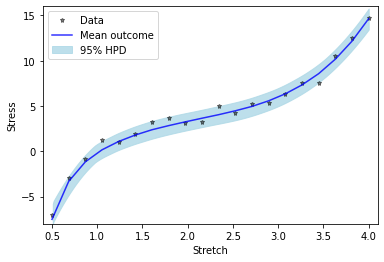

<Figure size 360x360 with 0 Axes>

In [19]:
_, ax = plt.subplots()
figure(figsize=(4.5,4.5), dpi=80)
az.plot_hpd(
   landa,
    ppc["Y"],
    ax=ax,
    fill_kwargs={"alpha": 0.8, "color": "lightblue", "label": "95% HPD"},
)
ax.plot(landa, sigma_1, "*",color='black', ms=5, alpha=0.5, label="Data")
ax.plot(landa, ppc["Y"].mean(0), label="Mean outcome",color='blue', alpha=0.8)
ax.set_ylabel("Stress")
ax.set_xlabel("Stretch")
ax.set(xlim=(0.4, 4.1), ylim=(-8, 16))
ax.legend(ncol=1, fontsize=10);



---


# **Based model with Yeoh parameters** 


In [20]:
N=20
Y1= np.zeros((5000,N))
for i in range(5000):
    C1= trace2['C1'][i]
    Y1[i,:]=2*(C1*(landa-1/landa**2))+snoise*np.random.normal()

/Users/milad.zeraatpisheh/anaconda3/envs/tf/lib/python3.6/site-packages/arviz/stats/stats.py:487: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


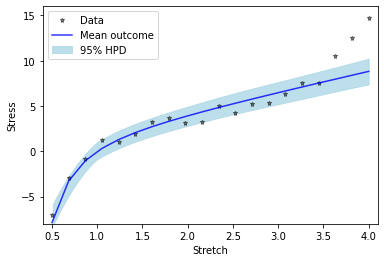

<Figure size 360x360 with 0 Axes>

In [21]:
_, ax = plt.subplots()
figure(figsize=(4.5,4.5), dpi=80)
az.plot_hpd(
   landa,
    Y1,
    ax=ax,
    fill_kwargs={"alpha": 0.8, "color": "lightblue", "label": "95% HPD"},
)
ax.plot(landa, sigma_1, "*",color='black', ms=5, alpha=0.5, label="Data")
ax.plot(landa, Y1.mean(0), label="Mean outcome",color='blue', alpha=0.8)
ax.set_ylabel("Stress")
ax.set_xlabel("Stretch")
ax.set(xlim=(0.4, 4.1), ylim=(-8, 16))
ax.legend(ncol=1, fontsize=10);
#plt.savefig('Yeoh25_1.png', dpi=500)



---


# **Constant model uncertainty**

In [22]:
with pm.Model() as case44:
    C1=pm.Uniform('C1',lower=-100,upper=200)
    C2=pm.Uniform('C2',lower=-100,upper=200)

    Y=pm.Normal('Y', mu=2*(C1*(landa-1/landa**2))+C2,sd=snoise, observed=sigma_1)
    trace44=pm.sample(10000,tune=2000,chains=1,random_seed=123)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [C2, C1]
Sampling chain 0, 0 divergences: 100%|██████████| 12000/12000 [00:07<00:00, 1657.19it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


In [23]:
ppc = pm.sample_posterior_predictive(trace44, samples=2000,model=case44)

/Users/milad.zeraatpisheh/anaconda3/envs/tf/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 2000/2000 [00:01<00:00, 1313.80it/s]


/Users/milad.zeraatpisheh/anaconda3/envs/tf/lib/python3.6/site-packages/arviz/stats/stats.py:487: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


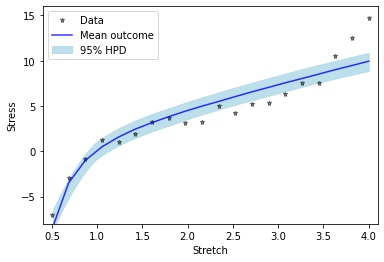

<Figure size 360x360 with 0 Axes>

In [24]:
_, ax = plt.subplots()
figure(figsize=(4.5,4.5), dpi=80)
az.plot_hpd(
   landa,
    ppc["Y"],
    ax=ax,
    fill_kwargs={"alpha": 0.8, "color": "lightblue", "label": "95% HPD"},
)
ax.plot(landa, sigma_1, "*",color='black', ms=5, alpha=0.5, label="Data")
ax.plot(landa, ppc["Y"].mean(0), label="Mean outcome",color='blue', alpha=0.8)
ax.set_ylabel("Stress")
ax.set_xlabel("Stretch")
ax.set(xlim=(0.4, 4.1), ylim=(-8, 16))
ax.legend(ncol=1, fontsize=10);





---


# **Based model with contant parameter**

/Users/milad.zeraatpisheh/anaconda3/envs/tf/lib/python3.6/site-packages/arviz/stats/stats.py:487: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


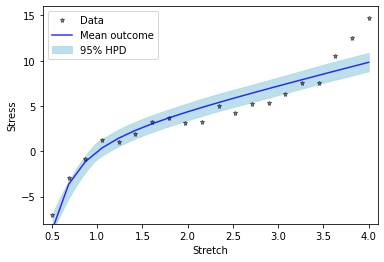

<Figure size 360x360 with 0 Axes>

In [25]:
N=20
Y1= np.zeros((5000,N))
for i in range(5000):
    C1= trace44['C1'][i]
    Y1[i,:]=2*(C1*(landa-1/landa**2))+snoise*np.random.normal()
_, ax = plt.subplots()
figure(figsize=(4.5,4.5), dpi=80)
az.plot_hpd(
   landa,
    Y1,
    ax=ax,
    fill_kwargs={"alpha": 0.8, "color": "lightblue", "label": "95% HPD"},
)
ax.plot(landa, sigma_1, "*",color='black', ms=5, alpha=0.5, label="Data")
ax.plot(landa, Y1.mean(0), label="Mean outcome",color='blue', alpha=0.8)
ax.set_ylabel("Stress")
ax.set_xlabel("Stretch")
ax.set(xlim=(0.4, 4.1), ylim=(-8, 16))
ax.legend(ncol=1, fontsize=10);




---


# **Linear model uncertainty**

In [26]:
with pm.Model() as case4:
    C1=pm.Uniform('C1',lower=-100,upper=200)
    C2=pm.Uniform('C2',lower=-100,upper=200)
    C3=pm.Uniform('C3',lower=-100,upper=200)
    Y=pm.Normal('Y', mu=2*(C1*(landa-1/landa**2))+C3+C2*landa,sd=snoise, observed=sigma_1)
    trace4=pm.sample(10000,tune=2000,chains=1,random_seed=123)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [C3, C2, C1]
Sampling chain 0, 0 divergences: 100%|██████████| 12000/12000 [00:22<00:00, 532.43it/s]
The acceptance probability does not match the target. It is 0.8806115639005134, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [27]:
ppc = pm.sample_posterior_predictive(trace4, samples=2000,model=case4)

/Users/milad.zeraatpisheh/anaconda3/envs/tf/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 2000/2000 [00:01<00:00, 1212.82it/s]


/Users/milad.zeraatpisheh/anaconda3/envs/tf/lib/python3.6/site-packages/arviz/stats/stats.py:487: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


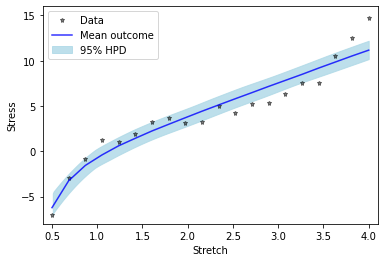

<Figure size 360x360 with 0 Axes>

In [28]:
_, ax = plt.subplots()
figure(figsize=(4.5,4.5), dpi=80)
az.plot_hpd(
   landa,
    ppc["Y"],
    ax=ax,
    fill_kwargs={"alpha": 0.8, "color": "lightblue", "label": "95% HPD"},
)
ax.plot(landa, sigma_1, "*",color='black', ms=5, alpha=0.5, label="Data")
ax.plot(landa, ppc["Y"].mean(0), label="Mean outcome",color='blue', alpha=0.8)
ax.set_ylabel("Stress")
ax.set_xlabel("Stretch")
ax.set(xlim=(0.4, 4.1), ylim=(-8, 16))
ax.legend(ncol=1, fontsize=10);





---


# **Based model with linear parameters**

/Users/milad.zeraatpisheh/anaconda3/envs/tf/lib/python3.6/site-packages/arviz/stats/stats.py:487: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


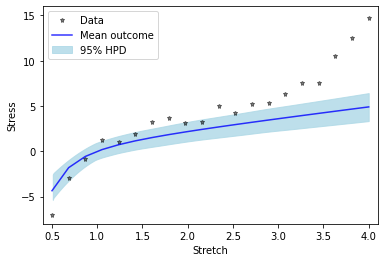

<Figure size 360x360 with 0 Axes>

In [29]:
N=20
Y1= np.zeros((5000,N))
for i in range(5000):
    C1= trace4['C1'][i]
    Y1[i,:]=2*(C1*(landa-1/landa**2))+snoise*np.random.normal()
_, ax = plt.subplots()
figure(figsize=(4.5,4.5), dpi=80)
az.plot_hpd(
   landa,
    Y1,
    ax=ax,
    fill_kwargs={"alpha": 0.8, "color": "lightblue", "label": "95% HPD"},
)
ax.plot(landa, sigma_1, "*",color='black', ms=5, alpha=0.5, label="Data")
ax.plot(landa, Y1.mean(0), label="Mean outcome",color='blue', alpha=0.8)
ax.set_ylabel("Stress")
ax.set_xlabel("Stretch")
ax.set(xlim=(0.4, 4.1), ylim=(-8, 16))
ax.legend(ncol=1, fontsize=10);




---


# **Quadratic model uncertainty**

In [30]:
with pm.Model() as case5:
    C1=pm.Uniform('C1',lower=-100,upper=200)
    C2=pm.Uniform('C2',lower=-100,upper=200)
    C3=pm.Uniform('C3',lower=-100,upper=200)
    C4=pm.Uniform('C4',lower=-100,upper=200)
    Y=pm.Normal('Y', mu=2*(C1*(landa-1/landa**2))+C2+C3*landa+C4*landa**2,sd=snoise, observed=sigma_1)
    trace5=pm.sample(5000,tune=5000,chains=1,random_seed=123)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [C4, C3, C2, C1]
Sampling chain 0, 0 divergences: 100%|██████████| 10000/10000 [00:54<00:00, 181.87it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


In [31]:
ppc = pm.sample_posterior_predictive(trace5, samples=2000,model=case5)

/Users/milad.zeraatpisheh/anaconda3/envs/tf/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 2000/2000 [00:01<00:00, 1155.13it/s]


/Users/milad.zeraatpisheh/anaconda3/envs/tf/lib/python3.6/site-packages/arviz/stats/stats.py:487: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


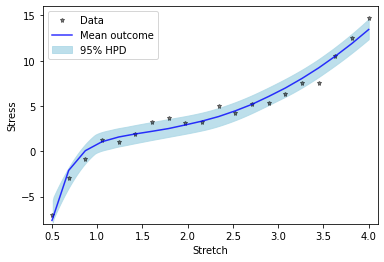

<Figure size 360x360 with 0 Axes>

In [32]:
_, ax = plt.subplots()
figure(figsize=(4.5,4.5), dpi=80)
az.plot_hpd(
   landa,
    ppc["Y"],
    ax=ax,
    fill_kwargs={"alpha": 0.8, "color": "lightblue", "label": "95% HPD"},
)
ax.plot(landa, sigma_1, "*",color='black', ms=5, alpha=0.5, label="Data")
ax.plot(landa, ppc["Y"].mean(0), label="Mean outcome",color='blue', alpha=0.8)
ax.set_ylabel("Stress")
ax.set_xlabel("Stretch")
ax.set(xlim=(0.4, 4.1), ylim=(-8, 16))
ax.legend(ncol=1, fontsize=10);



---


# **Based model with quadratic parameters**

/Users/milad.zeraatpisheh/anaconda3/envs/tf/lib/python3.6/site-packages/arviz/stats/stats.py:487: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


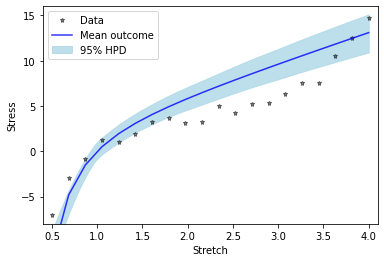

<Figure size 360x360 with 0 Axes>

In [33]:
N=20
Y1= np.zeros((5000,N))
for i in range(5000):
    C1= trace5['C1'][i]
    Y1[i,:]=2*(C1*(landa-1/landa**2))+snoise*np.random.normal()
_, ax = plt.subplots()
figure(figsize=(4.5,4.5), dpi=80)
az.plot_hpd(
   landa,
    Y1,
    ax=ax,
    fill_kwargs={"alpha": 0.8, "color": "lightblue", "label": "95% HPD"},
)
ax.plot(landa, sigma_1, "*",color='black', ms=5, alpha=0.5, label="Data")
ax.plot(landa, Y1.mean(0), label="Mean outcome",color='blue', alpha=0.8)
ax.set_ylabel("Stress")
ax.set_xlabel("Stretch")
ax.set(xlim=(0.4, 4.1), ylim=(-8, 16))
ax.legend(ncol=1, fontsize=10);
#plt.savefig('quad25_1.png', dpi=500)



---


# **Comparision between marginal posterior for C10**

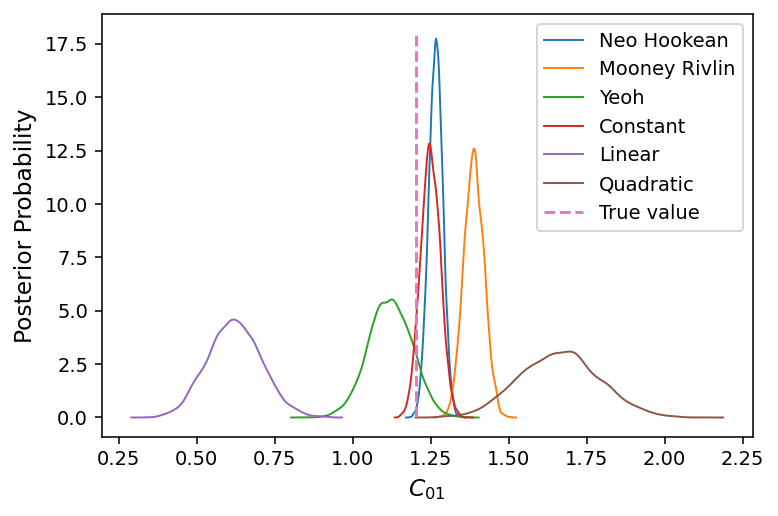

In [44]:
import seaborn as sns

yy=np.linspace(0,18,10)
aa=np.ones(10)*1.202
figure(figsize=(6,4), dpi=140)
sns.distplot(trace['C1'], hist=False, kde=True, 
             bins=int(180/5), 
             hist_kws={'edgecolor':'black'},label='Neo Hookean',
             kde_kws={'linewidth': 1})
sns.distplot(trace1['C1'], hist=False, kde=True,label='Mooney Rivlin',
             bins=int(180/5), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})
plt.xlabel('C1')
sns.distplot(trace2['C1'], hist=False, kde=True, 
             bins=int(180/5),  
             hist_kws={'edgecolor':'black'},label='Yeoh',
             kde_kws={'linewidth': 1})
plt.xlabel('C1')
sns.distplot(trace44['C1'], hist=False, kde=True,label='Constant',
             bins=int(180/5), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})
plt.xlabel('C1')
sns.distplot(trace4['C1'], hist=False, kde=True, 
             bins=int(180/5), 
             hist_kws={'edgecolor':'black'},label='Linear',
             kde_kws={'linewidth': 1})
plt.xlabel('C1')
sns.distplot(trace5['C1'], hist=False, kde=True, 
             bins=int(180/5), 
             hist_kws={'edgecolor':'black'},label='Quadratic',
             kde_kws={'linewidth': 1})

plt.plot(aa,yy,'--',label='True value')
plt.xlabel('$C_{01}$', size=12)
#plt.xlim([0, 2.25]) 


plt.ylabel('Posterior Probability', size=12)
plt.legend()
